<a href="https://colab.research.google.com/github/francobiglione/ProteinBiophysics/blob/main/CD_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **Download and Import Libraries**
import os
!git clone https://github.com/francobiglione/ProteinBiophysics
from ProteinBiophysics import cd_library as cd
import seaborn as sns
import matplotlib.pyplot as plt

Cloning into 'ProteinBiophysics'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 108 (delta 6), reused 0 (delta 0), pack-reused 96
Receiving objects: 100% (108/108), 48.14 KiB | 3.44 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [2]:
#@title **How to define classes and import data**
single_spectra = cd.cd_spectra('/content/ProteinBiophysics/tutorials/cd_example_single_spectra.csv') #Data from a single spectra
melting_curve = cd.cd_melting_curve('/content/ProteinBiophysics/tutorials/cd_example_melting_curve.csv') #Data from a melting curve followed at a single wavelength
temperature_series = cd.cd_melting_spectra('/content/ProteinBiophysics/tutorials/cd_example_temperature_series.csv') #Data from a temperature interval analysis experiment

/content/ProteinBiophysics/cd_library.py:409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CD_filtered [mdeg]'][data['HT [V]'] <= ht_max] = data['CD_raw [mdeg]'][data['HT [V]'] <= ht_max]


# **Single Spectra Class**:  How-to guide

In [3]:
#@title Analysis of a Single Spectra: Get Attributes
print('single_spectra.path: ', single_spectra.path) #Path of the imported file
print('single_spectra.name: ', single_spectra.name) #Name of the file
print('single_spectra.title: ', single_spectra.title) #Title inside the file
print('single_spectra.wv_min:', single_spectra.wv_min) #Minumum registered Wavelength in raw data
print('single_spectra.wv_max:', single_spectra.wv_max) #maximum registered Wavelength in raw data
print('single_spectra.wv_delta:', single_spectra.wv_delta) #Data pitch interval
print('single_spectra.wv_cutoff:', single_spectra.wv_cutoff) #Last wavelength at which the HT<ht_max
print('\nsingle_spectra.wavelength_raw:\n\n', single_spectra.wavelength) #Raw Wavelengths 
print('\nsingle_spectra.ellipticity_raw:\n\n', single_spectra.ellipticity_raw) #Raw ellipticity
print('\nsingle_spectra.ht:\n\n', single_spectra.ht) #HT

print('\n\nsingle_spectra.info: ') #Information at the beginning of the file
display(single_spectra.info)
print('\n\nsingle_spectra.metadata: ') #Information at the end of the file
display(single_spectra.metadata)

single_spectra.path:  /content/ProteinBiophysics/tutorials/cd_example_single_spectra.csv
single_spectra.name:  cd_example_single_spectra
single_spectra.title:  221108_single_spectra_example
single_spectra.wv_min: 190.0
single_spectra.wv_max: 240.0
single_spectra.wv_delta: 1.0
single_spectra.wv_cutoff: 196.0

single_spectra.wavelength_raw:

 0     240.0
1     239.0
2     238.0
3     237.0
4     236.0
5     235.0
6     234.0
7     233.0
8     232.0
9     231.0
10    230.0
11    229.0
12    228.0
13    227.0
14    226.0
15    225.0
16    224.0
17    223.0
18    222.0
19    221.0
20    220.0
21    219.0
22    218.0
23    217.0
24    216.0
25    215.0
26    214.0
27    213.0
28    212.0
29    211.0
30    210.0
31    209.0
32    208.0
33    207.0
34    206.0
35    205.0
36    204.0
37    203.0
38    202.0
39    201.0
40    200.0
41    199.0
42    198.0
43    197.0
44    196.0
45    195.0
46    194.0
47    193.0
48    192.0
49    191.0
50    190.0
Name: Wavelength [nm], dtype: float64

single

Information,TITLE,DATA TYPE,ORIGIN,OWNER,DATE,TIME,SPECTROMETER/DATA SYSTEM,LOCALE,RESOLUTION,DELTAX,XUNITS,YUNITS,Y2UNITS,FIRSTX,LASTX,NPOINTS,FIRSTY,MAXY,MINY,XYDATA
Data,221108_single_spectra_example,NaN,JASCO,NaN,22/11/08,11:16:14,NaN,11274,NaN,-1,NANOMETERS,CD [mdeg],HT [V],"240,0000","190,0000",51,"-1,25173","16,73963","-18,27633",NaN




single_spectra.metadata: 


Metadata,Sample name,Comment,User,Division,Company,[Detailed Information],Creation date,Data array type,Horizontal axis,Vertical axis(1),...,FL scale,D.I.T.,Bandwidth,Start mode,Scanning mode,Scanning speed,Baseline correction,Shutter control,Accumulations,N2 Flowmeter
Data,221108_single_spectra_example,NaN,NaN,NaN,IBR,NaN,8/11/2022 11:16,Linear data array * 2,Wavelength [nm],CD [mdeg],...,200 mdeg/1.0 dOD,4 sec,10.00 nm,Immediately,Continuous,50 nm/min,None,Auto,4,Manual


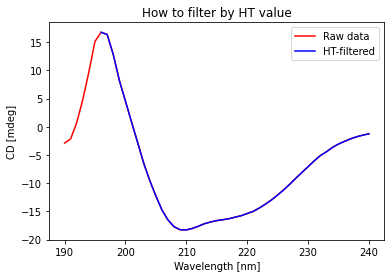

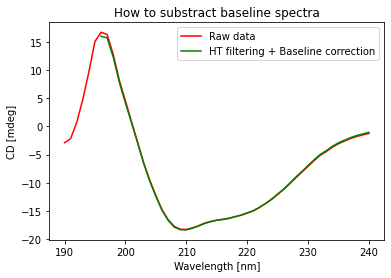

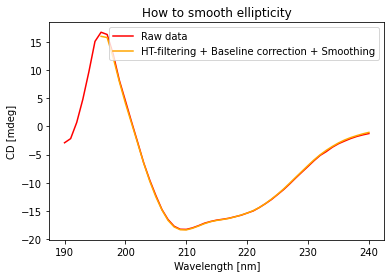

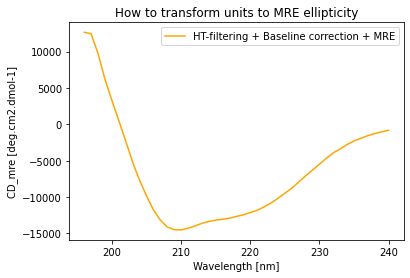

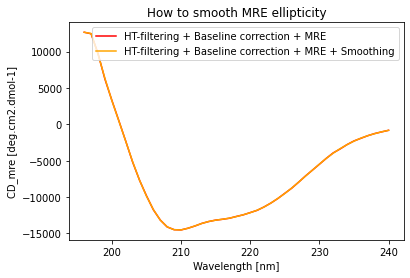

In [4]:
#@title Analysis of a Single Spectra: Apply Methods and plot spectra

'''How to filter by HT value:'''
single_spectra.ht_filter() #Filters by ht_max and replaces the value of single_spectra.ellipticity and single_spectra.wavelength
plt.plot(single_spectra.wavelength_raw,single_spectra.ellipticity_raw,c='red',label='Raw data')
plt.plot(single_spectra.wavelength,single_spectra.ellipticity,c='blue',label='HT-filtered')
plt.ylabel(single_spectra.ellipticity_raw.name)
plt.xlabel(single_spectra.wavelength_raw.name)
plt.legend()
plt.title('How to filter by HT value')
plt.show()



'''How to substract baseline spectra:'''
single_spectra.baseline('/content/ProteinBiophysics/tutorials/cd_example_single_spectra_buffer.csv') #Substracts baseline
plt.plot(single_spectra.wavelength_raw,single_spectra.ellipticity_raw,c='red',label='Raw data')
plt.plot(single_spectra.wavelength,single_spectra.ellipticity,c='green',label='HT filtering + Baseline correction')
plt.ylabel(single_spectra.ellipticity_raw.name)
plt.xlabel(single_spectra.wavelength_raw.name)
plt.title('How to substract baseline spectra')
plt.legend()
plt.show()


'''How to smooth spectra in CD units:'''
single_spectra.smooth(11,7) #Substracts baseline
plt.plot(single_spectra.wavelength_raw,single_spectra.ellipticity_raw,c='red',label='Raw data')
plt.plot(single_spectra.wavelength,single_spectra.smoothed,c='orange',label='HT-filtering + Baseline correction + Smoothing')
plt.ylabel(single_spectra.ellipticity_raw.name)
plt.xlabel(single_spectra.wavelength_raw.name)
plt.legend()
plt.title('How to smooth ellipticity')
plt.show()


'''How to transform to MRE:'''
single_spectra.mre(0.000016444,77,0.1)
plt.plot(single_spectra.wavelength,single_spectra.ellipticity,c='orange',label='HT-filtering + Baseline correction + MRE')
plt.ylabel(single_spectra.ellipticity.name)
plt.xlabel(single_spectra.wavelength.name)
plt.legend()
plt.title('How to transform units to MRE ellipticity')
plt.show()



'''How to smooth spectra in MRE units:'''
single_spectra.smooth(11,7) #Substracts baseline
plt.plot(single_spectra.wavelength,single_spectra.ellipticity,c='red',label='HT-filtering + Baseline correction + MRE')
plt.plot(single_spectra.wavelength,single_spectra.smoothed,c='orange',label='HT-filtering + Baseline correction + MRE + Smoothing')
plt.ylabel(single_spectra.ellipticity.name)
plt.xlabel(single_spectra.wavelength.name)
plt.legend()
plt.title('How to smooth MRE ellipticity')
plt.show()


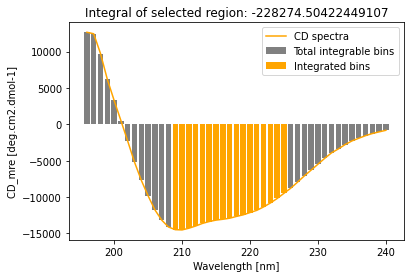

In [5]:
#@title Analysis of a Single Spectra: Integrate spectrum region


'''How to integrate region using Riemann's sum approximation'''

wv_limit_lower = 208
wv_limit_upper = 225
single_spectra.integrate(wv_limit_lower,wv_limit_upper)
upper_idx = single_spectra.wavelength[single_spectra.wavelength == wv_limit_lower].index[0]
lower_idx = single_spectra.wavelength[single_spectra.wavelength == wv_limit_upper].index[0]
plt.plot(single_spectra.wavelength,single_spectra.ellipticity,c='orange', label = 'CD spectra')
plt.bar(single_spectra.wavelength,single_spectra.ellipticity,color = 'gray', label = 'Total integrable bins')
plt.bar(single_spectra.wavelength.iloc[lower_idx:upper_idx],single_spectra.ellipticity.iloc[lower_idx:upper_idx],color = 'orange', label = 'Integrated bins')
plt.ylabel(single_spectra.ellipticity.name)
plt.xlabel(single_spectra.wavelength.name)
plt.title(f'Integral of selected region: {single_spectra.integral}')
plt.legend()

# **Melting Curve Class:**  How-to guide

In [6]:
#@title Analysis of a Melting Curve: Get Attributes
print('melting_curve.path: ', melting_curve.path) #Path of the imported file
print('melting_curve.name: ', melting_curve.name) #Name of the file
print('melting_curve.title: ', melting_curve.title) #Title inside the file
print('melting_curve.temp_min:', melting_curve.temp_min) #Minumum registered Temperature
print('melting_curve.temp_max:', melting_curve.temp_max) #maximum registered Temperature
print('\nmelting_curve.wv_monitor:\n\n', melting_curve.wv_monitor) #Shows the wavelength at which the ellipticity was measured
print('\nmelting_curve.ellipticity:\n\n', melting_curve.ellipticity) #Ellipticity at each masured temperature
print('\nmelting_curve.ht:\n\n', melting_curve.ht) #HT for each temperature at the monitor wavelength

print('\n\nmelting_curve.info: ') #Information at the beginning of the file
display(melting_curve.info)
print('\n\nmelting_curve.metadata: ') #Information at the end of the file
display(melting_curve.metadata)

melting_curve.path:  /content/ProteinBiophysics/tutorials/cd_example_melting_curve.csv
melting_curve.name:  cd_example_melting_curve
melting_curve.title:  221109_melting_curve_example
melting_curve.temp_min: 95.07
melting_curve.temp_max: 25.01

melting_curve.wv_monitor:

 214.0

melting_curve.ellipticity:

 0    -11.22870
1    -10.80400
2    -10.87630
3    -10.61570
4    -10.82120
        ...   
66    -5.93313
67    -5.57544
68    -5.45181
69    -5.61938
70    -5.56047
Name: CD [mdeg], Length: 71, dtype: float64

melting_curve.ht:

 0     271.931
1     272.107
2     272.120
3     272.194
4     272.161
       ...   
66    278.025
67    278.203
68    278.353
69    278.479
70    278.698
Name: HT [V], Length: 71, dtype: float64


melting_curve.info: 


Information,TITLE,DATA TYPE,ORIGIN,OWNER,DATE,TIME,SPECTROMETER/DATA SYSTEM,LOCALE,XUNITS,YUNITS,Y2UNITS,FIRSTX,LASTX,NPOINTS,XYDATA
Data,221109_melting_curve_example,NaN,JASCO,NaN,22/11/09,11:07:08,NaN,11274,Temperature[C],CD [mdeg],HT [V],"25,0100","95,0700",71,NaN




melting_curve.metadata: 


Metadata,Sample name,Comment,User,Division,Company,[Detailed Information],Creation date,Data array type,Horizontal axis,Vertical axis(1),...,Measurement date,Photometric mode,CD scale,FL scale,D.I.T.,Bandwidth,Monitor wavelength,Baseline correction,Shutter control,No. of cycle
Data,221109_melting_curve_example,221109,NaN,NaN,IBR,NaN,9/11/2022 11:07,Non-linear data array * 2,Temperature [C],CD [mdeg],...,9/11/2022 11:03,"CD, HT",200 mdeg/1.0 dOD,200 mdeg/1.0 dOD,2 sec,5.00 nm,214 nm,None,Auto,1


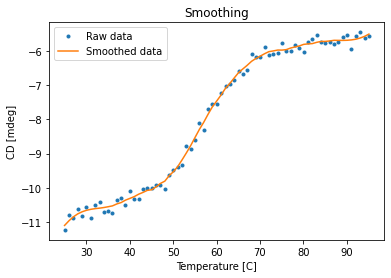

In [7]:
#@title Analysis of a Melting Curve: Apply Methods and plot spectra
'''How to smooth data to make a nicer plot'''
melting_curve.smooth(17,3)
plt.plot(melting_curve.temperatures,melting_curve.ellipticity, '.', label = 'Raw data')
plt.plot(melting_curve.temperatures,melting_curve.smoothed, label = 'Smoothed data')
plt.xlabel(melting_curve.temperatures.name+' [C]')
plt.ylabel(melting_curve.ellipticity.name)
plt.title('Smoothing')
plt.legend()

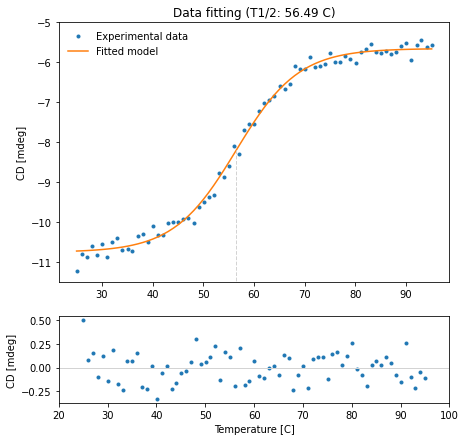

In [8]:
#@title Analysis of a Melting Curve: Fit melting data to a generic sigmoid function

from scipy.optimize import curve_fit
import numpy as np

'''Define a generic sigmoid function
  ---------
  ellip_0: ellipticity for the fully folded species
  ellip_1: ellipticity for the fully unfolded species
  k: sigmoid constant
  t12: T1/2, middle temperature at which the sigmoid has its inflection point

'''
def sigmoid(temp,ellip_0,ellip_f,t12,k):
  ellip = ellip_0 + ellip_f/(1+np.exp(-k*(temp-t12)))
  return ellip



'''Fit experimental data to the sigmoid function using curve_fit'''
#Set initial estimates for ellip_0, ellip_1, t12 and k in p0 in the same order as defined in the fitted equation. The parameter t12 can be infered from visually guessing the inflection point of the plotted data.

fittedParameters, pcov = curve_fit(sigmoid, melting_curve.temperatures, melting_curve.ellipticity, p0=[melting_curve.ellipticity.iloc[1],melting_curve.ellipticity.iloc[-1],60,1])
t12 = fittedParameters[2]
ellip_t12 = sigmoid(t12,*fittedParameters)


'''Model experimental data with the fitted parameters'''

fig,ax= plt.subplots(nrows=2, ncols=1,figsize=(7,7),gridspec_kw={'height_ratios': [3, 1]})
model_data = sigmoid(melting_curve.temperatures,*fittedParameters)
ax[0].plot(melting_curve.temperatures,melting_curve.ellipticity, '.', label = 'Experimental data')
ax[0].plot(melting_curve.temperatures,model_data, label = 'Fitted model')
ax[0].plot([t12,t12],[-12,ellip_t12], '--', linewidth = 1, color = 'lightgrey') #Add line to mark the ellipticity at t12
ax[0].legend(frameon = False)
ax[0].set_title(f'Data fitting (T1/2: {t12:.2f} C)')
ax[0].set_ylim(-11.5,-5)
ax[0].set_ylabel(melting_curve.ellipticity.name)
'''Plot residuals'''
ax[1].plot(melting_curve.temperatures,model_data-melting_curve.ellipticity, '.',label='Residuals')
ax[1].plot([0,100],[0,0], '-', linewidth = 1, color = 'lightgrey')
plt.xlim(20,100)
plt.xlabel(melting_curve.temperatures.name+' [C]')
ax[1].set_ylabel(melting_curve.ellipticity.name)
plt.show()


# **Temperature Spectra Series Class:** How-to guide

In [9]:
#@title Analysis of Temperature Series: Get Attributes

print('temperature_series.path: ', temperature_series.path) #Path of the imported file
print('temperature_series.name: ', temperature_series.name) #Name of the file
print('temperature_series.title: ', temperature_series.title) #Title inside the file
print('temperature_series.wavelength:', temperature_series.wavelength) #Measuring wavelengths
print('temperature_series.temperatures:', temperature_series.temperatures) #Temperatures at which each spectrum was acquired
print('temperature_series.wv_delta:', temperature_series.wv_delta) #Data pitch interval
print('\n\ntemperature_series.info: ') #Information at the beginning of the file
display(temperature_series.info)
print('\n\ntemperature_series.data: ') #DataFrame with all the spectral data
display(temperature_series.data)

temperature_series.path:  /content/ProteinBiophysics/tutorials/cd_example_temperature_series.csv
temperature_series.name:  cd_example_temperature_series
temperature_series.title:  221109_temperature_series_example
temperature_series.wavelength: [240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190]
temperature_series.temperatures: [25.0, 40.02, 50.02, 55.01, 60.01, 65.02, 70.05, 80.02, 94.97]
temperature_series.wv_delta: 1.0


temperature_series.info: 


Information,TITLE,DATA TYPE,ORIGIN,OWNER,DATE,TIME,SPECTROMETER/DATA SYSTEM,DELTAX,XUNITS,YUNITS,Y2UNITS,FIRSTX,LASTX,NPOINTS,FIRSTY,MAXY,MINY,XYDATA,Channel 1
Data,221109_temperature_series_example,CD SPECTRUM,JASCO,NaN,2022/11/09,11:07:08,"JASCO Corp., J-1500, Rev. 1.00",-1,NANOMETERS,CD [mdeg],HT [V],"240,0000","190,0000",51,"-1,50297","9,82418","-11,90620",NaN,NaN




temperature_series.data: 


,Wavelength [nm],Temperature,CD_raw [mdeg],HT [V],CD_filtered [mdeg]
0,240,25.00,-1.502970,253.028,-1.50297
1,239,25.00,-1.771160,254.111,-1.77116
2,238,25.00,-2.016160,255.301,-2.01616
3,237,25.00,-2.243380,256.613,-2.24338
4,236,25.00,-2.537130,258.042,-2.53713
...,...,...,...,...,...
454,194,94.97,-1.199610,1089.140,NaN
455,193,94.97,-1.223670,1089.330,NaN
456,192,94.97,0.696199,1089.460,NaN
457,191,94.97,2.973160,1089.530,NaN


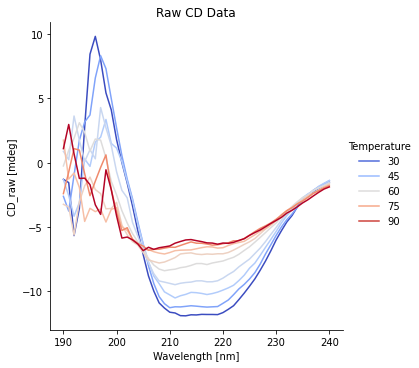

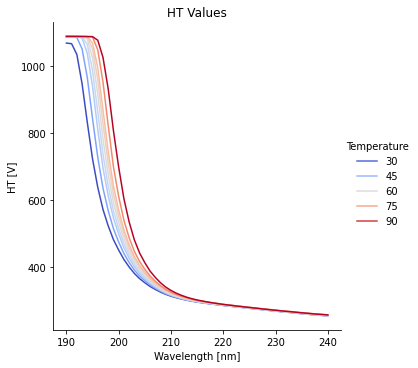

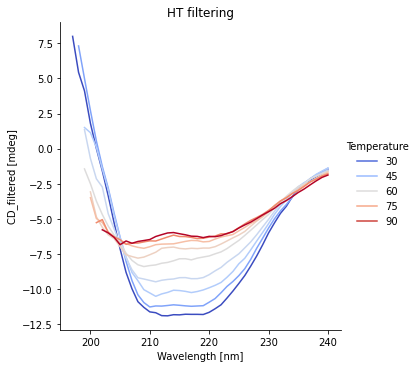

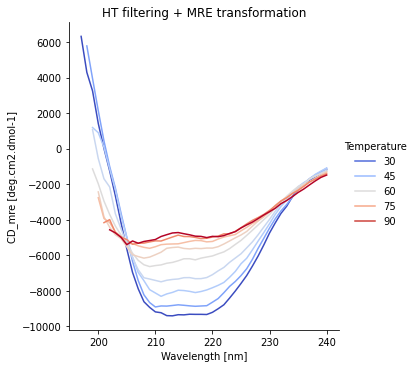

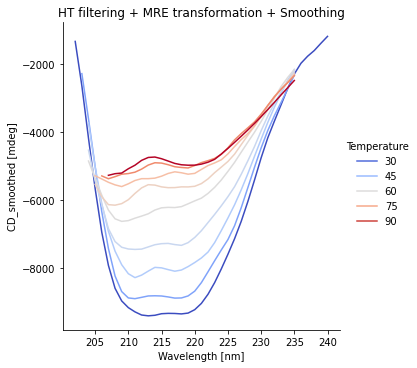

In [10]:
#@title Analysis of a Temperature Series: Apply Methods and plot spectra

'''How to plot all the CD spectra and color them by temperature'''
sns.relplot(data = temperature_series.data, x='Wavelength [nm]', y ='CD_raw [mdeg]', kind ='line', hue ='Temperature', palette = 'coolwarm').set(title='Raw CD Data')

'''How to plot all the HT spectra and color them by temperature'''
sns.relplot(data = temperature_series.data, x='Wavelength [nm]', y ='HT [V]', kind ='line', hue ='Temperature', palette = 'coolwarm').set(title='HT Values')

'''How to plot all the HT filtered CD spectra and color them by temperature'''
sns.relplot(data = temperature_series.data, x='Wavelength [nm]', y ='CD_filtered [mdeg]', kind ='line', hue ='Temperature', palette = 'coolwarm').set(title='HT filtering')

'''How to transform to MRE'''
temperature_series.mre(0.000016444,77,0.1)
sns.relplot(data = temperature_series.data, x='Wavelength [nm]', y ='CD_mre [deg.cm2.dmol-1]', kind ='line', hue ='Temperature', palette = 'coolwarm').set(title='HT filtering + MRE transformation')

'''How to smooth data'''
temperature_series.smooth(11,7)
sns.relplot(data = temperature_series.data, x='Wavelength [nm]', y ='CD_smoothed [mdeg]', kind ='line', hue ='Temperature', palette = 'coolwarm').set(title='HT filtering + MRE transformation + Smoothing')


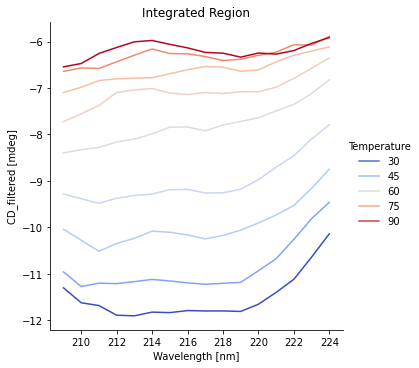

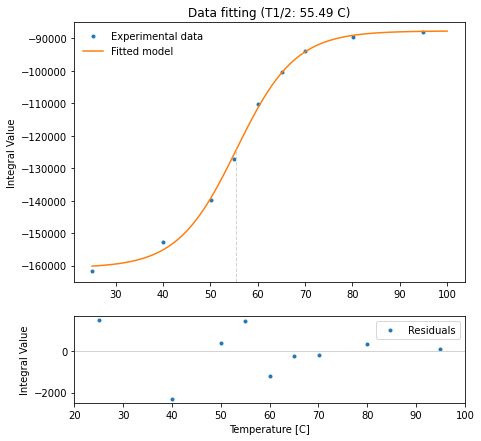

In [11]:
#@title Analysis of a Temperature Series: Integrate all the spectra and fit integrals to a generic sigmoid function

from scipy.optimize import curve_fit
import numpy as np


'''How to integrate each spectrum at a defined interval'''
wv_limit_lower = 208
wv_limit_upper = 225

sns.relplot(data = temperature_series.data[(temperature_series.data['Wavelength [nm]']>wv_limit_lower) & (temperature_series.data['Wavelength [nm]']<wv_limit_upper)], x='Wavelength [nm]', y ='CD_filtered [mdeg]', kind ='line', hue ='Temperature', palette = 'coolwarm').set(title='Integrated Region')

plt.show()

temperature_series.integrate(wv_limit_lower,wv_limit_upper)


'''Define a generic sigmoid function
  ---------
  ellip_0: integrals for the fully folded species
  ellip_1: integrals for the fully unfolded species
  k: sigmoid constant
  t12: T1/2, middle temperature at which the sigmoid has its inflection point

'''
def sigmoid(temp,ellip_0,ellip_f,t12,k):
  ellip = ellip_0 + ellip_f/(1+np.exp(-k*(temp-t12)))
  return ellip



'''Fit experimental data to the sigmoid function using curve_fit'''
#Set initial estimates for ellip_0, ellip_1, t12 and k in p0 in the same order as defined in the fitted equation. The parameter t12 can be infered from visually guessing the inflection point of the plotted data.

fittedParameters, pcov = curve_fit(sigmoid, temperature_series.temperatures, temperature_series.integrals, p0=[temperature_series.integrals[1],temperature_series.integrals[-1],60,1])
t12 = fittedParameters[2]
ellip_t12 = sigmoid(t12,*fittedParameters)


'''Model experimental data with the fitted parameters'''

fig,ax= plt.subplots(nrows=2, ncols=1,figsize=(7,7),gridspec_kw={'height_ratios': [3, 1]})
model_temps = np.linspace(25,100,num=100)
model_data = sigmoid(model_temps,*fittedParameters)
fitted_data = sigmoid(temperature_series.temperatures,*fittedParameters)
ax[0].plot(temperature_series.temperatures,temperature_series.integrals, '.', label = 'Experimental data')
ax[0].plot(model_temps,model_data, label = 'Fitted model')
ax[0].plot([t12,t12],[-165000,ellip_t12], '--', linewidth = 1, color = 'lightgrey') #Add line to mark the integrals at t12
ax[0].legend(frameon = False)
ax[0].set_title(f'Data fitting (T1/2: {t12:.2f} C)')
ax[0].set_ylim(-165000,-85000)
ax[0].set_ylabel('Integral Value')
'''Plot residuals'''
ax[1].plot(temperature_series.temperatures,fitted_data-temperature_series.integrals, '.',label='Residuals')
ax[1].plot([0,100],[0,0], '-', linewidth = 1, color = 'lightgrey')
plt.xlim(20,100)
plt.xlabel('Temperature [C]')
ax[1].legend()
ax[1].set_ylabel('Integral Value')
plt.show()
